In [1]:
pip install sklearn

  Using cached https://files.pythonhosted.org/packages/d9/3a/eb8d7bbe28f4787d140bb9df685b7d5bf6115c0e2a969def4027144e98b6/scikit_learn-0.23.1-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/dc/29/162476fd44203116e7980cfbd9352eef9db37c49445d1fec35509022f6aa/scipy-1.4.1-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/f7/12/ec3f2e203afa394a149911729357aa48affc59c20e2c1c8297a60f33f133/threadpoolctl-2.1.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/03/27/e35e7c6e6a52fab9fcc64fc2b20c6b516eba930bb02b10ace3b38200d3ab/numpy-1.18.4-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/b8/a6/d1a816b89aa1e9e96bcb298eb1ee1854f21662ebc6d55ffa3d7b3b50122b/joblib-0.15.1-py3-none-any.whl
  Running setup.py bdist_wheel for sklearn ... done
  Stored in directory: /home/gauri/.cache/pip/wheels/76/03/bb/589d421d27431bcd2c6da284d5f2286c8e3b2ea3cf1594c074
Successfully 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("spam.tsv", sep='\t', names=['Class','Message'])

In [5]:
df.head()

,Class,Message
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!!


In [36]:
df['Length'] = df['Message'].apply(len)

In [37]:
df.head()

,Class,Message,Length
0,ham,I've been searching for the right words to tha...,196
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
2,ham,"Nah I don't think he goes to usf, he lives aro...",61
3,ham,Even my brother is not like to speak with me. ...,77
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!!,36


In [38]:
df.isnull().sum()

Class      0
Message    0
Length     0
dtype: int64

In [39]:
len(df)

5567

In [40]:
df.describe()

,Length
count,5567.000000
mean,80.450153
std,59.891023
min,2.000000
25%,36.000000
50%,62.000000
75%,122.000000
max,910.000000


In [41]:
df['Class'].value_counts()

ham     4821
spam     746
Name: Class, dtype: int64

In [42]:
ham = df[df['Class']=='ham']

In [43]:
ham.head()

,Class,Message,Length
0,ham,I've been searching for the right words to tha...,196
2,ham,"Nah I don't think he goes to usf, he lives aro...",61
3,ham,Even my brother is not like to speak with me. ...,77
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!!,36
5,ham,As per your request 'Melle Melle (Oru Minnamin...,160


In [44]:
spam = df[df['Class']=='spam']

In [45]:
spam.head()

,Class,Message,Length
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
6,spam,WINNER!! As a valued network customer you have...,157
7,spam,Had your mobile 11 months or more? U R entitle...,154
9,spam,"SIX chances to win CASH! From 100 to 20,000 po...",136
10,spam,URGENT! You have won a 1 week FREE membership ...,155


In [46]:
ham.shape, spam.shape

((4821, 3), (746, 3))

In [47]:
ham = ham.sample(spam.shape[0])

In [48]:
ham.shape, spam.shape

((746, 3), (746, 3))

In [49]:
data = ham.append(spam, ignore_index=True)

In [50]:
data.head()

,Class,Message,Length
0,ham,Dont kick coco when he's down,29
1,ham,"Haha, just what I was thinkin",29
2,ham,Pls speak to that customer machan.,34
3,ham,Oh for fuck's sake she's in like tallahassee,44
4,ham,Just do what ever is easier for you,35


In [51]:
data.tail()

,Class,Message,Length
1487,spam,Want explicit SEX in 30 secs? Ring 02073162414...,90
1488,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,158
1489,spam,Had your contract mobile 11 Mnths? Latest Moto...,160
1490,spam,REMINDER FROM O2: To get 2.50 pounds free call...,147
1491,spam,This is the 2nd time we have tried 2 contact u...,160


### Exploratory Data Analysis

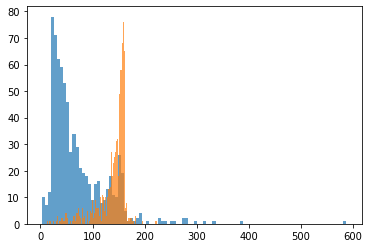

In [53]:
plt.hist(data[data['Class']=='ham']['Length'], bins = 100, alpha = 0.7)
plt.hist(data[data['Class']=='spam']['Length'], bins = 100, alpha = 0.7)
plt.show()

### Data Preparation

In [100]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline

In [78]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [79]:
data.head()

,Class,Message,Length
0,ham,Dont kick coco when he's down,29
1,ham,"Haha, just what I was thinkin",29
2,ham,Pls speak to that customer machan.,34
3,ham,Oh for fuck's sake she's in like tallahassee,44
4,ham,Just do what ever is easier for you,35


In [80]:
X_train, X_test, y_train, y_test = train_test_split(data['Message'], data['Class'], test_size = 0.3, random_state = 0, shuffle = True, stratify = data['Class'])

In [60]:
X_train

800     Thanks for your Ringtone Order, Reference T91....
932     FREE entry into our £250 weekly comp just send...
1410    Great News! Call FREEFONE 08006344447 to claim...
1243    YES! The only place in town to meet exciting a...
970     As a Registered Subscriber yr draw 4 a £100 gi...
                              ...                        
1458    URGENT! You have won a 1 week FREE membership ...
742                    No my blankets are sufficient, thx
109     IM GONNAMISSU SO MUCH!!I WOULD SAY IL SEND U A...
529                                Sorry, I'll call later
798     Update_Now - Xmas Offer! Latest Motorola, Sony...
Name: Message, Length: 1044, dtype: object

In [61]:
y_train

800     spam
932     spam
1410    spam
1243    spam
970     spam
        ... 
1458    spam
742      ham
109      ham
529      ham
798     spam
Name: Class, Length: 1044, dtype: object

#### Bag of Words Creation 

In [74]:
vectorizer = TfidfVectorizer()

In [63]:
X_train = vectorizer.fit_transform(X_train)

In [64]:
X_train.shape

(1044, 3771)

In [65]:
X_train

<1044x3771 sparse matrix of type '<class 'numpy.float64'>'
	with 17807 stored elements in Compressed Sparse Row format>

### Pipeline and RandomForestClassifier 

In [81]:
clf = Pipeline([('tfidf', TfidfVectorizer()), ('clf', RandomForestClassifier(n_estimators=100, n_jobs=-1))])

In [82]:
clf.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf', RandomForestClassifier(n_jobs=-1))])

In [83]:
y_pr = clf.predict(X_test)

In [84]:
confusion_matrix(y_test, y_pr)

array([[223,   1],
       [ 18, 206]])

In [85]:
print(classification_report(y_test, y_pr))

              precision    recall  f1-score   support

         ham       0.93      1.00      0.96       224
        spam       1.00      0.92      0.96       224

    accuracy                           0.96       448
   macro avg       0.96      0.96      0.96       448
weighted avg       0.96      0.96      0.96       448



In [86]:
accuracy_score(y_test, y_pr)

0.9575892857142857

In [91]:
clf.predict(["Hi, long time"])

array(['ham'], dtype=object)

In [92]:
clf.predict(["Congratulations!, you have won free tickets to Mauritius this summer! TEXT 'WON' TO 45678"])

array(['spam'], dtype=object)

In [93]:
clf.predict(["Congratulations!, you have won free tickets to Mauritius this summer!"])

array(['spam'], dtype=object)

In [94]:
clf.predict(["you have won free tickets to Mauritius this summer!"])

array(['spam'], dtype=object)

### SVM

In [123]:
clf = Pipeline([('tfidf', TfidfVectorizer()), ('clf', SVC(C = 2000, gamma = 'auto'))])

In [124]:
clf.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf', SVC(C=2000, gamma='auto'))])

In [125]:
y_pr = clf.predict(X_test)

In [126]:
confusion_matrix(y_test, y_pr)

array([[219,   5],
       [  9, 215]])

In [127]:
print(classification_report(y_test, y_pr))

              precision    recall  f1-score   support

         ham       0.96      0.98      0.97       224
        spam       0.98      0.96      0.97       224

    accuracy                           0.97       448
   macro avg       0.97      0.97      0.97       448
weighted avg       0.97      0.97      0.97       448



In [128]:
accuracy_score(y_test, y_pr)

0.96875

In [129]:
clf.predict(["Hi, long time"])

array(['ham'], dtype=object)

In [130]:
clf.predict(["Congratulations!, you have won free tickets to Mauritius this summer! TEXT 'WON' TO 45678"])

array(['spam'], dtype=object)

In [131]:
clf.predict(["Congratulations!, you have won free tickets to Mauritius this summer!"])

array(['spam'], dtype=object)

In [132]:
clf.predict(["you have won free tickets to Mauritius this summer!"])

array(['spam'], dtype=object)